In [1]:
import pandas as pd
import PortfolioAnalyser as pa
import cufflinks as cf
import PortfolioAnalyser as pa

In [2]:
import pandas_datareader.data as web
import datetime
start = datetime.datetime(2000, 1, 1)
DFII10 = web.DataReader('DFII10', 'fred', start)
gold = web.DataReader('GOLDPMGBD228NLBM', 'fred', start)

In [3]:
gold.columns = ['GOLD']

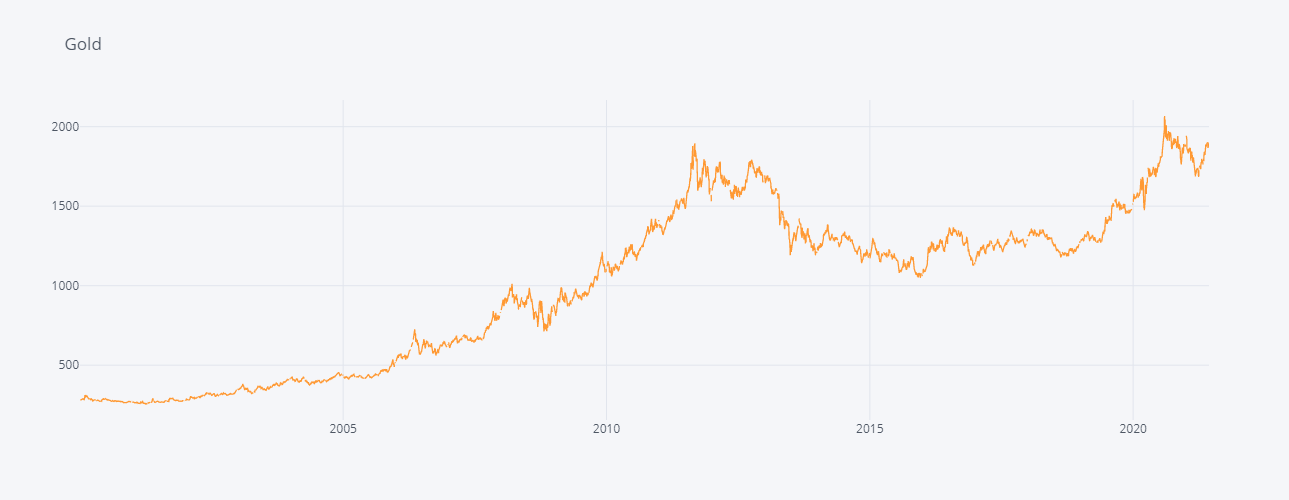

In [4]:
gold.iplot(dimensions=pa.dimensions, title='Gold')

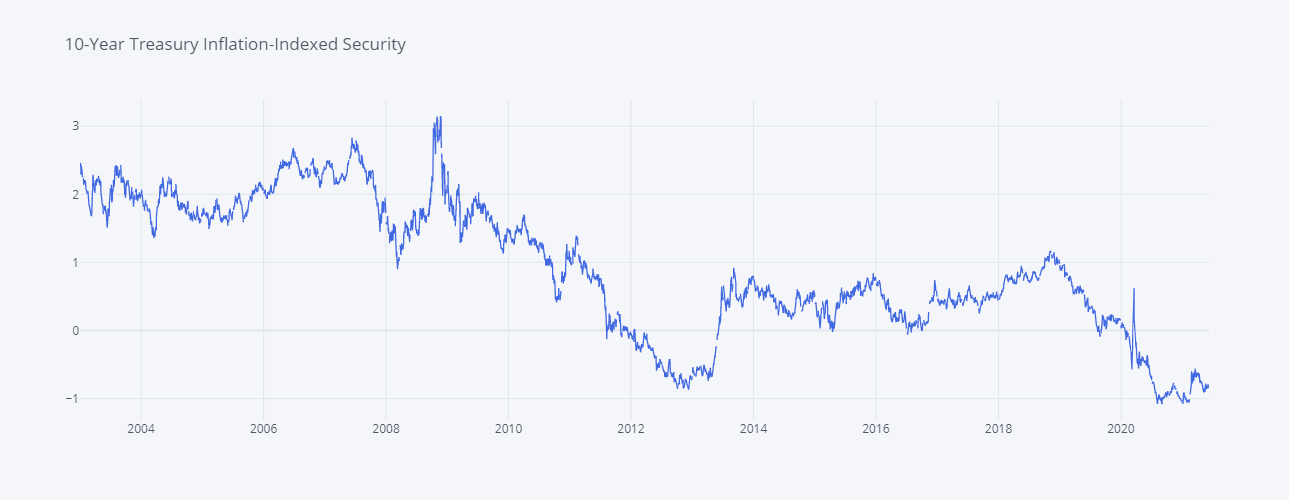

In [5]:
DFII10.iplot(dimensions=pa.dimensions, title='10-Year Treasury Inflation-Indexed Security', color='royalblue')

In [6]:
data = pa.merge_time_series(DFII10, gold, how='inner').ffill()
pa.print_title('Data')
data

**Data**

,DFII10,GOLD
DATE,,
2003-01-02,2.43,343.80
2003-01-03,2.43,344.50
2003-01-06,2.46,351.75
2003-01-07,2.42,349.00
2003-01-08,2.29,349.75
...,...,...
2021-06-03,-0.79,"1,866.55"
2021-06-04,-0.84,"1,890.60"
2021-06-07,-0.82,"1,888.40"


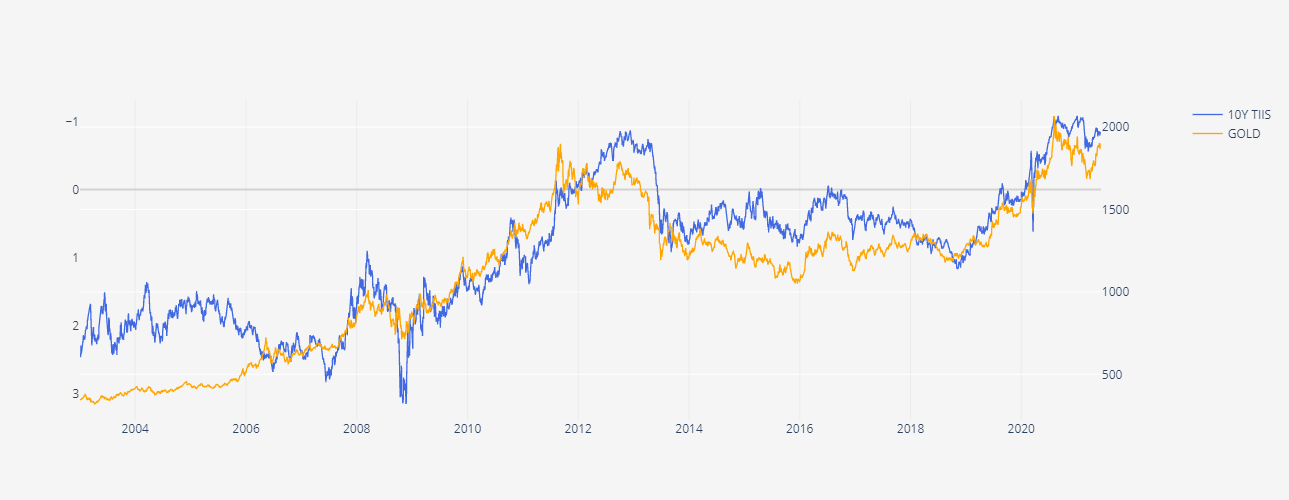

In [7]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(x=data.index, y=data['DFII10'], name="10Y TIIS", line=dict(color = 'royalblue', width = 1.3)),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=data.index, y=data['GOLD'], name="GOLD", line=dict(color = 'orange', width = 1.3)),
    secondary_y=True,
)

# Add figure title
fig.update_layout(
    title_text="",
    width=990,
    height=500,
    plot_bgcolor='#f5f5f5',
    paper_bgcolor='#f5f5f5',
    xaxis=dict(
        title='',
        showgrid=True,
        gridcolor='#ebebeb',
        titlefont=dict(size=12),
    ),    
    yaxis=dict(
        title='',
        showgrid=False,
        gridcolor='#ebebeb',
        zeroline=True, # Adicionar ou não a zero line
        zerolinecolor='#d2d2d2',
        autorange='reversed'

    )
)

# Set y-axes titles
fig.update_yaxes(title_text="", secondary_y=False)
fig.update_yaxes(title_text="", secondary_y=True)

fig.show()

In [8]:
import statsmodels.api as sm
pa.compute_r2_table(data[['DFII10']], data['GOLD'])

,DFII10
GOLD,0.81


In [9]:
data

,DFII10,GOLD
DATE,,
2003-01-02,2.43,343.80
2003-01-03,2.43,344.50
2003-01-06,2.46,351.75
2003-01-07,2.42,349.00
2003-01-08,2.29,349.75
...,...,...
2021-06-03,-0.79,"1,866.55"
2021-06-04,-0.84,"1,890.60"
2021-06-07,-0.82,"1,888.40"


In [10]:
X = data['DFII10']
Y = data['GOLD']

X = sm.add_constant(X) # adding a constant
model = sm.OLS(Y, X).fit()
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                   GOLD   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                 2.074e+04
Date:                Fri, 11 Jun 2021   Prob (F-statistic):               0.00
Time:                        16:17:15   Log-Likelihood:                -32078.
No. Observations:                4810   AIC:                         6.416e+04
Df Residuals:                    4808   BIC:                         6.417e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1479.1104      3.777    391.594      0.0

In [11]:
data = data[['DFII10', 'GOLD']].dropna()
grangercausalitytests(data, maxlag=3)

NameError: name 'grangercausalitytests' is not defined

In [12]:
data

,DFII10,GOLD
DATE,,
2003-01-02,2.43,343.80
2003-01-03,2.43,344.50
2003-01-06,2.46,351.75
2003-01-07,2.42,349.00
2003-01-08,2.29,349.75
...,...,...
2021-06-03,-0.79,"1,866.55"
2021-06-04,-0.84,"1,890.60"
2021-06-07,-0.82,"1,888.40"


In [13]:
data.to_csv('10y_TIIS_vs_GOLD.csv')

In [14]:
returns = data.pct_change().dropna()#.resample('W').last()

import numpy as np
returns = returns[~returns.isin([np.nan, np.inf, -np.inf]).any(1)]

pa.print_title('Returns in percentage')
returns * 100

**Returns in percentage**

,DFII10,GOLD
DATE,,
2003-01-03,0.00,0.20
2003-01-06,1.23,2.10
2003-01-07,-1.63,-0.78
2003-01-08,-5.37,0.21
2003-01-09,5.24,0.76
...,...,...
2021-06-03,-7.06,-1.90
2021-06-04,6.33,1.29
2021-06-07,-2.38,-0.12


In [15]:
returns

,DFII10,GOLD
DATE,,
2003-01-03,0.00,0.00
2003-01-06,0.01,0.02
2003-01-07,-0.02,-0.01
2003-01-08,-0.05,0.00
2003-01-09,0.05,0.01
...,...,...
2021-06-03,-0.07,-0.02
2021-06-04,0.06,0.01
2021-06-07,-0.02,-0.00


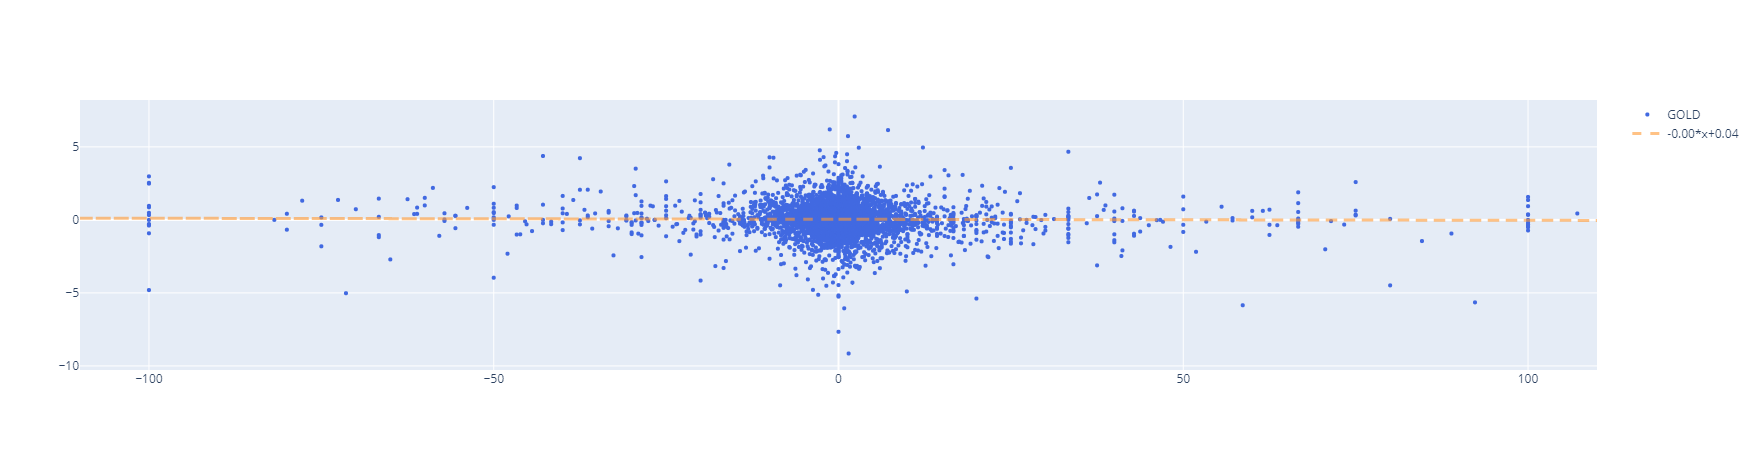

In [16]:
import plotly.graph_objs as go    
layout = go.Layout(
        xaxis=dict(
            range=[-110, 110]
        ),
        yaxis=dict(
#             range=[-5, 5]
        )
    )

returns_100 = returns * 100

returns_100.iplot(kind='scatter',x='DFII10',y='GOLD',mode='markers', dimensions=pa.dimensions,
                color='royalblue', bestfit=True, size=4,
                yTitle='Gold', xTitle='TIPS', layout=layout)

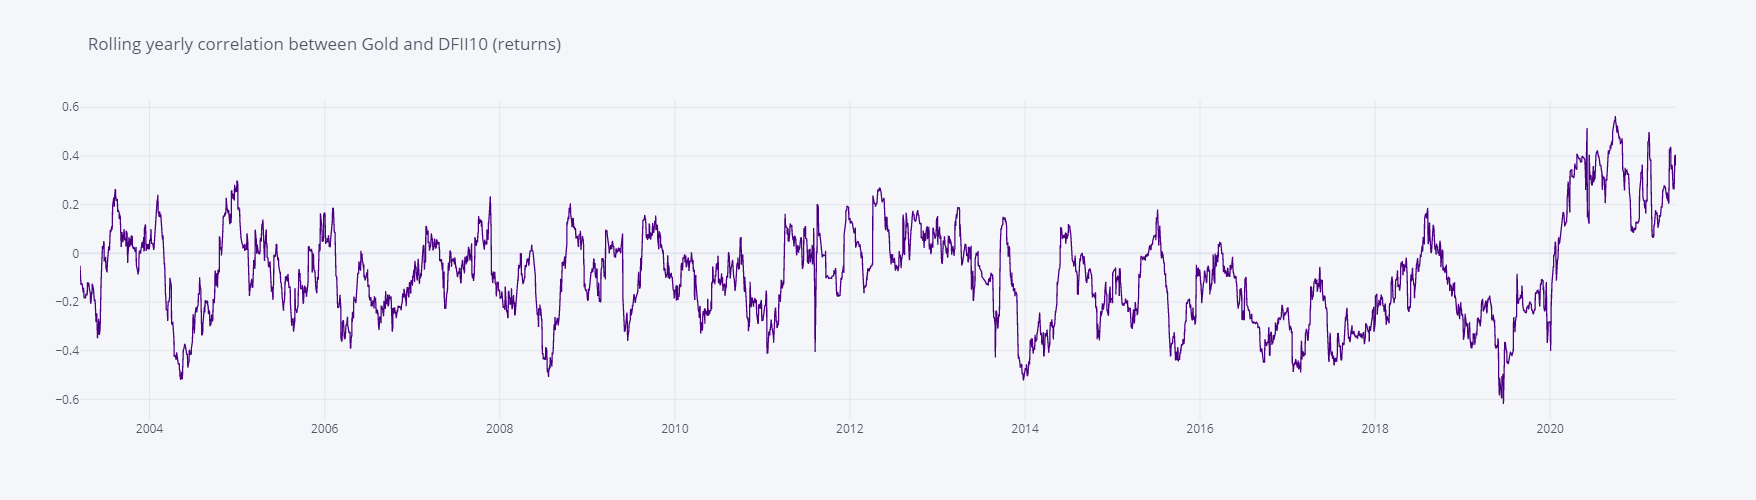

In [17]:
returns['GOLD'].rolling(52).corr(returns['DFII10']).dropna().iplot(dimensions=pa.dimensions, color='indigo', title='Rolling yearly correlation between Gold and DFII10 (returns)')

In [ ]:
returns['GOLD'].rolling(52).corr(returns['DFII10']).dropna().to_csv('GOLD_DFII10_correlation.csv')

In [ ]:
from IPython.display import display
from IPython.display import HTML
import IPython.core.display as di # Example: di.display_html('<h3>%s:</h3>' % str, raw=True)

# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Código ON/OFF</button>''', raw=True)

In [ ]:
start = datetime.datetime(2000, 1, 1)
M2V = web.DataReader('M2V', 'fred', start)
WALCL = web.DataReader('WALCL', 'fred', start)

data = pa.merge_time_series(M2V, WALCL, how='outer').ffill()

In [ ]:
data = data.resample('Q').last()

In [ ]:
data.to_csv('MV2_vs_WALCL.csv')

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(x=data.index, y=data['M2V'], name="M2V", line=dict(color = 'royalblue', width = 1.3)),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=data.index, y=data['WALCL'], name="WALCL", line=dict(color = 'orange', width = 1.3)),
    secondary_y=True,
)

# Add figure title
fig.update_layout(
    title_text="",
    width=990,
    height=500,
    plot_bgcolor='#f5f5f5',
    paper_bgcolor='#f5f5f5',
    xaxis=dict(
        title='',
        showgrid=True,
        gridcolor='#ebebeb',
        titlefont=dict(size=12),
    ),    
    yaxis=dict(
        title='',
        showgrid=False,
        gridcolor='#ebebeb',
        zeroline=True, # Adicionar ou não a zero line
        zerolinecolor='#d2d2d2',

    )
)

# Set y-axes titles
fig.update_yaxes(title_text="", secondary_y=False)
fig.update_yaxes(title_text="", secondary_y=True)

fig.show()

In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import grangercausalitytests
import numpy as np

In [ ]:
grangercausalitytests(returns, maxlag=3)

In [ ]:
data = sm.datasets.macrodata.load_pandas()
data = data.data[['realgdp', 'realcons']].dropna()
grangercausalitytests(data, maxlag=3)

In [ ]:
data['DFII10']